In [3]:
# Import necessary libraries
# - `geopandas` for geographic data manipulation
# - `matplotlib.pyplot` for visualization
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
# Load the sidewalk dataset
# `sidewalk_data` contains geographic locations of sidewalks across NYC.
sidewalk_data = gpd.read_file('./files/NYC_Planimetric_Database__Sidewalk_20250228.csv', encoding='utf-8')

# Load the Business Improvement Districts (BIDs) dataset
# `bid_data` includes geographic boundaries of BIDs across NYC.
bid_data = gpd.read_file('../common_files/NYC_BIDS_09112015.csv', encoding='utf-8')

In [15]:
sidewalk_data.head()

,the_geom,SOURCE_ID,SUB_CODE,FEAT_CODE,STATUS,SHAPE_Leng,SHAPE_Area
0,MULTIPOLYGON (((-74.2380411327345 40.503304808...,17380002462,380010,3800,Unchanged,171.8796812,381.992662417
1,MULTIPOLYGON (((-74.23840190286064 40.50320476...,17380002463,380010,3800,Unchanged,234.828361674,569.974911574
2,MULTIPOLYGON (((-74.23845881329208 40.50279385...,17380002464,380010,3800,Unchanged,182.583439795,526.928330918
3,MULTIPOLYGON (((-74.1629625944757 40.587253637...,17380002465,380000,3800,Unchanged,315.61767845,977.458209277
4,MULTIPOLYGON (((-74.2114832157234 40.548710612...,17380002466,380000,3800,Unchanged,334.736304295,857.690169393


In [16]:
bid_data.head()

,the_geom,Id,OBJECTID_1,OBJECTID_2,Shape_Leng,F_ALL_BIDs,F_ALL_BI_1,F_ALL_BI_2,F_ALL_BI_3,F_ALL_BI_4,F_ALL_BI_6,F_ALL_BI_7,Shape_Le_1,Shape_Ar_1,Year_Found,Shape_Area
0,MULTIPOLYGON (((-73.94296015325146 40.73949166...,0,0,0,0,0,Queens,Long Island City Partnership,0,https://www.longislandcityqueens.com/,0,0,0,0,2005,0
1,MULTIPOLYGON (((-73.89166191549769 40.67759930...,0,0,0,0,0,Brooklyn,Cypress Hills Fulton,0,https://cypresshillsfultonbid.org/,0,0,0,0,2023,0
2,MULTIPOLYGON (((-73.98282323348212 40.73130538...,0,0,1,0,0,Manhattan,Union Square Partnership,892,https://www.unionsquarenyc.org/,3400000,3950623,25744.4695903,1275270.53685,1984,206555.808776
3,MULTIPOLYGON (((-73.9419337956347 40.806137014...,0,0,2,0,0,Manhattan,125th Street,220,https://www.125thstreet.nyc/,1240462,1289475,18167.7930477,982675.507591,1994,159516.90573
4,MULTIPOLYGON (((-73.9188925538744 40.825078988...,0,0,3,0,1,Bronx,161st Street,145,http://www.161bid.com/,1687028,506873,16588.0134708,1303742.08624,2005,211748.007845


In [17]:
sidewalk_gdf = gpd.GeoDataFrame(
    sidewalk_data, 
    geometry=gpd.GeoSeries.from_wkt(sidewalk_data['the_geom'])
)
bid_gdf = gpd.GeoDataFrame(
    bid_data,
    geometry=gpd.GeoSeries.from_wkt(bid_data['the_geom']),
)

In [21]:
# Filter for West Village BID
wv_bid = bid_gdf[bid_gdf['F_ALL_BI_2'] == 'West Village']
# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_wv_data = wv_bid.explode()

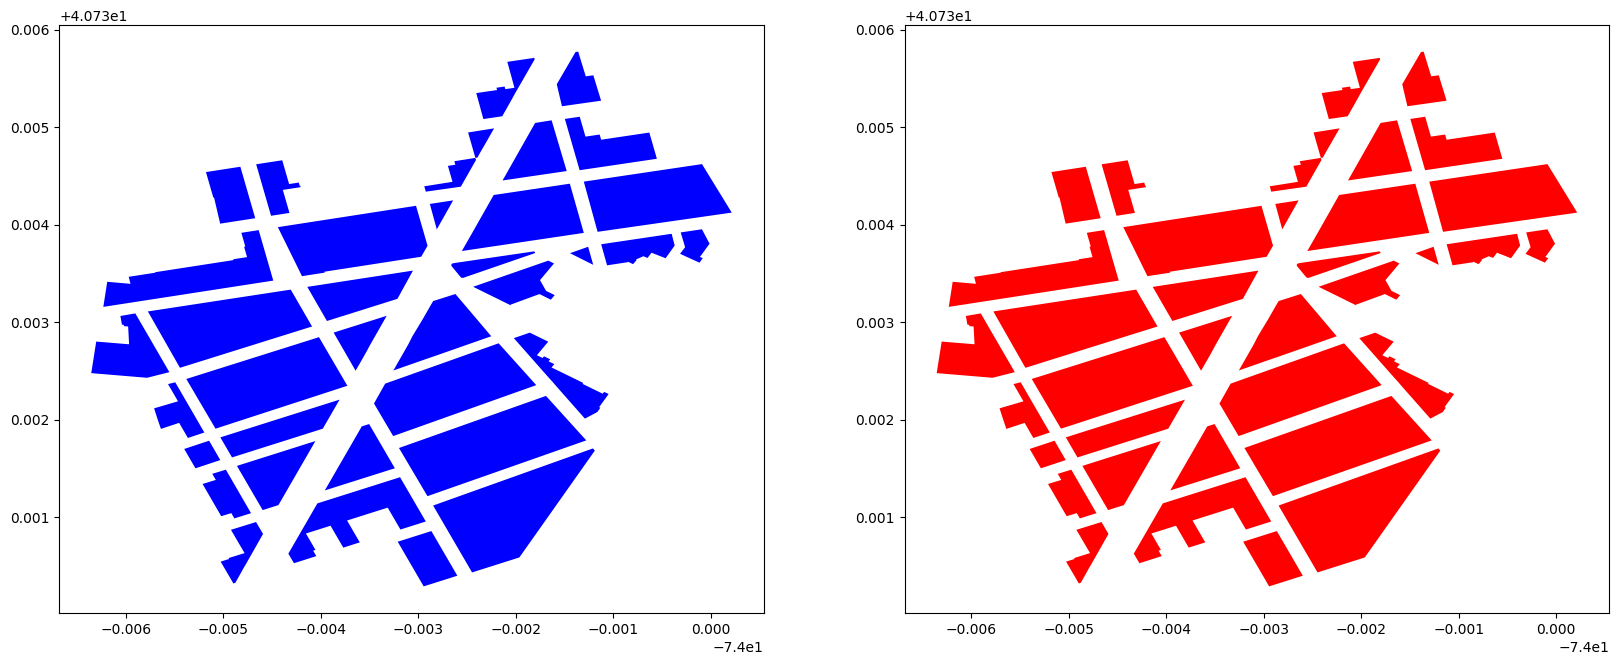

In [27]:
# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))

# plot the bid_data_objectid_2_0 geodataframe
wv_bid.plot(ax=ax[0], color='blue', markersize=.01)
# plot the exploded geodataframe
exploded_wv_data.plot(ax=ax[1], color='red', markersize=.01)

plt.show()

In [35]:
# Similarly explode the sidewalk MultiPolygons
exploded_sidewalk_data = sidewalk_gdf.explode(index_parts=True)

In [36]:
# Spatial join directly without bbox filtering
sidewalks_within_bbox = gpd.sjoin(
    exploded_sidewalk_data, 
    exploded_wv_data, 
    how='inner', 
    predicate='intersects'
)

print("Number of sidewalks found:", len(sidewalks_within_bbox))

Number of sidewalks found: 37


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32884\2182875301.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32884\2182875301.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


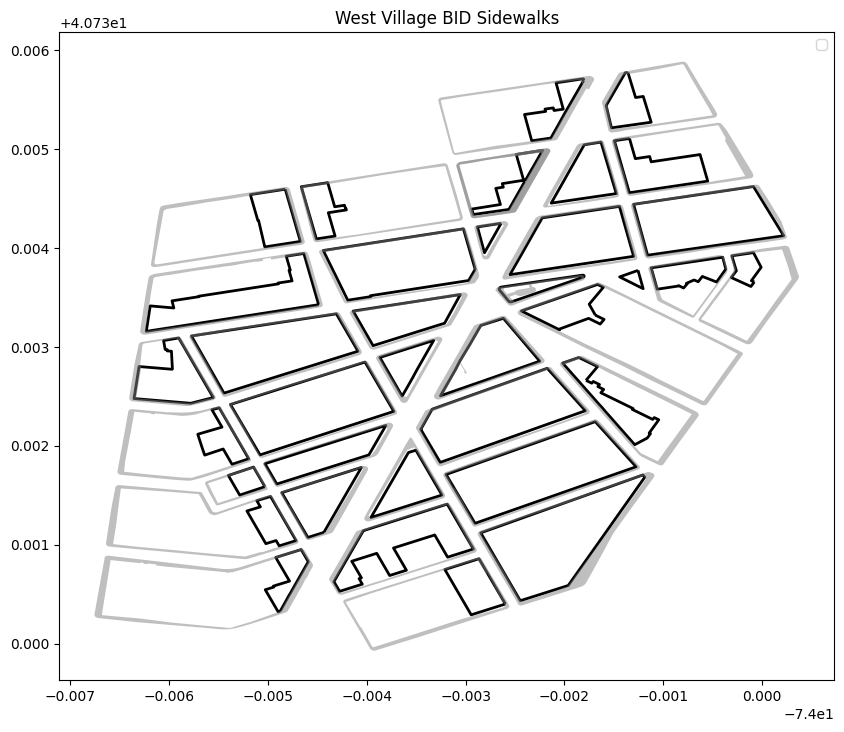

In [37]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the BID boundary
wv_bid.plot(ax=ax, color='none', edgecolor='black', linewidth=2, label='BID Boundary')

# Plot the sidewalks
sidewalks_within_bbox.plot(ax=ax, color='gray', alpha=0.5, label='Sidewalks')

# Add labels and title
plt.title('West Village BID Sidewalks')
plt.legend()

# Show the plot
plt.show()

In [38]:
# Save the processed sidewalk data as GeoJSON
sidewalks_within_bbox.to_file("./files/sidewalks_within_bbox.json", driver='GeoJSON')

# Save the BID boundary as GeoJSON
wv_bid.to_file("./files/wv_bid.json", driver='GeoJSON')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
